In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [8]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

# RETRIEVING AND BASIC FORMATTING EXCEL FILES

## Retrieving the .xlsx files
Find the directory where the excel files are living. 

Then **'excel_files'** will report what lives inside the folder. 

Note: Any additional excel files you want analysed will need to be put into the same location as **'directory'.**

In [9]:
directory = r"\\dc2-file001\Practice\InfoTech\BIM\Revit\RevitStandardsMasterBVN\02_BVN_Library\Master Content\X_Data\Data - ARR\_CONSOLIDATED v3"
files = os.listdir(directory)
excel_files = []
for f in files:
    if ".xlsx" in f:
        excel_files.append(f)
excel_files

['20170706 12_20 Family Types Log.xlsx',
 '20170706 12_20 FamilyCategory Log.xlsx',
 '20170706 12_20 FamilySubCategory Log.xlsx',
 '20170706 12_20 Host Families Log.xlsx',
 '20170706 12_20 Materials Log.xlsx',
 '20170706 12_20 Nested Families Log.xlsx',
 '20170706 12_20 OmniClass Log.xlsx',
 '20170706 12_20 Parameters Log.xlsx',
 '20170706 12_20 ParameterValuesByTypes Log.xlsx',
 '20170706 12_20 Reference Planes Log.xlsx',
 '20170706 12_20 Units Log.xlsx']

## xlsx. key and values

Use <b>keys</b> to pair each key with each excel file in <b>excel_files</b>. This is so that you don't have to type the long file name everytime you need to call it in the rest of the code. 

<b>file_dict</b> will tell you which excel file is paired with each key.

In [10]:
keys = [
        "FamilyTypes",
        "FamilyCategory",
        "FamilySubCategory",
        "HostFamilies",
        "Materials",
        "NestedFamilies",
        "Omniclass",
        "Parameters",
        "ParameterValuesByTypes",
        "ReferencePlanes",
        "Units",
        
       ]

file_dict = {key: value for (key, value) in zip(keys, excel_files)}
file_dict

{'FamilyCategory': '20170706 12_20 FamilyCategory Log.xlsx',
 'FamilySubCategory': '20170706 12_20 FamilySubCategory Log.xlsx',
 'FamilyTypes': '20170706 12_20 Family Types Log.xlsx',
 'HostFamilies': '20170706 12_20 Host Families Log.xlsx',
 'Materials': '20170706 12_20 Materials Log.xlsx',
 'NestedFamilies': '20170706 12_20 Nested Families Log.xlsx',
 'Omniclass': '20170706 12_20 OmniClass Log.xlsx',
 'ParameterValuesByTypes': '20170706 12_20 ParameterValuesByTypes Log.xlsx',
 'Parameters': '20170706 12_20 Parameters Log.xlsx',
 'ReferencePlanes': '20170706 12_20 Reference Planes Log.xlsx',
 'Units': '20170706 12_20 Units Log.xlsx'}

## FUNCTIONS TO FORMAT EXCEL FILES

### Removing the common file path characters from original family file path name

The example file path below is very long. In order to cut the fat out of the long file path, the common characters from each file path is removed. 

\\dc2-file001\Practice\InfoTech\BIM\Revit\RevitStandardsMasterBVN\02_BVN_Library\Master Content\Windows\Double Hung\Double Hung_3 Panel.rfa

Therefore, the start of the file path <b>\\dc2-file001\Practice\InfoTech\BIM\Revit\RevitStandardsMasterBVN\02_BVN_Library\Master Content</b> is removed in every spreadsheet.

### Removing the rfa. name from FamilyFilePath.

In the excel files, the family name (.rfa) is part of the FamilyFilePath column.

e.g. \\dc2-file001\Practice\InfoTech\BIM\Revit\RevitStandardsMasterBVN\02_BVN_Library\Master Content\Windows\Special\<u>Window Lancet_basic.rfa</u>

### Determines whether the family is an .rfa or from a .txt catalogue file.

<b> remove_rfaName</b> removes the family name from the FamilyFilePath column. This allows us to find things such as the count of how many families there are within a particular master content folder. It splits the <b>full_filepath</b> path by each \ .

<b>joined_again</b> will join the file path back through the \ except for the last one. The new file path is appended on a FamilyFilePath column.

### Determines whether the family is an .rfa or from a .txt catalogue file.
<b>getFileType</b> removes the last three characters from the FamilyFilePath.

<b>stripFileType</b> removes the last four characters (including the '.') from the FamilyName.

In [11]:
commonPartofFilePath = len(r'\\dc2-file001\Practice\InfoTech\BIM\Revit\RevitStandardsMasterBVN\02_BVN_Library\Master Content')
print commonPartofFilePath
def stripCommonPath(row):
        return row.FamilyFilePath[commonPartofFilePath+1:]
    
def remove_rfaName(row):
    full_filepath = row.FamilyFilePath
    split = full_filepath.split("\\")[:-1]
    joined_again = ("\\".join(split))
    return  joined_again

def getFileType(row):
    return row.FamilyFilePath[-3:]

def stripFileType(row):
    return row.FamilyName[:-4]

95


# FAMILY SUBCATEGORIES

<b>fs_path</b> and <b>fs</b> reads the data from the Family Subcategories excel file.

<b>NOTE:</b> The columns - LinePatternName, LineWeight_Projection, LineWeight_Cut are dropped from the dataframe.

In [13]:
fs_path = os.path.join(directory, file_dict["FamilySubCategory"])
fs = pd.read_excel(fs_path)

fs["FamilyFilePath"] = fs.apply(remove_rfaName, axis=1)
fs["FamilyFilePath"] = fs.apply(stripCommonPath, axis=1)
fs["FamilyName"] = fs.apply(stripFileType, axis=1)

fs.drop(["LinePatternName", "LineWeight_Projection", "LineWeight_Cut"],axis=1, inplace=True)

fs.head()

,FamilyFilePath,FamilyName,Category,Subcategory,Id,ColourAsRGB,MaterialName,SubCategoryAction,SubcategoryActionParameter
0,Windows\Structural,Window_Square Opening_WIN,Windows,Frame/Mullion,-2000018,"0,127,0",NaN,None,NaN
1,Windows\Structural,Window_Square Opening_WIN,Windows,Glass,-2000016,"0,0,127",NaN,None,NaN
2,Windows\Structural,Window_Square Opening_WIN,Windows,Opening,-2000022,"0,0,0",NaN,None,NaN
3,Windows\Structural,Window_Square Opening_WIN,Windows,Overhead,6564,"0,0,0",NaN,None,NaN
4,Windows\Structural,Window_Square Opening_WIN,Windows,Opening Elevation,6561,"0,0,0",NaN,None,NaN


## Number of subcategories of families

<b>fs_counts</b> and <b>grouped_subcat</b> counts the number of subcategories there are within each family.

In [14]:
fs_counts = fs["Subcategory"].value_counts()

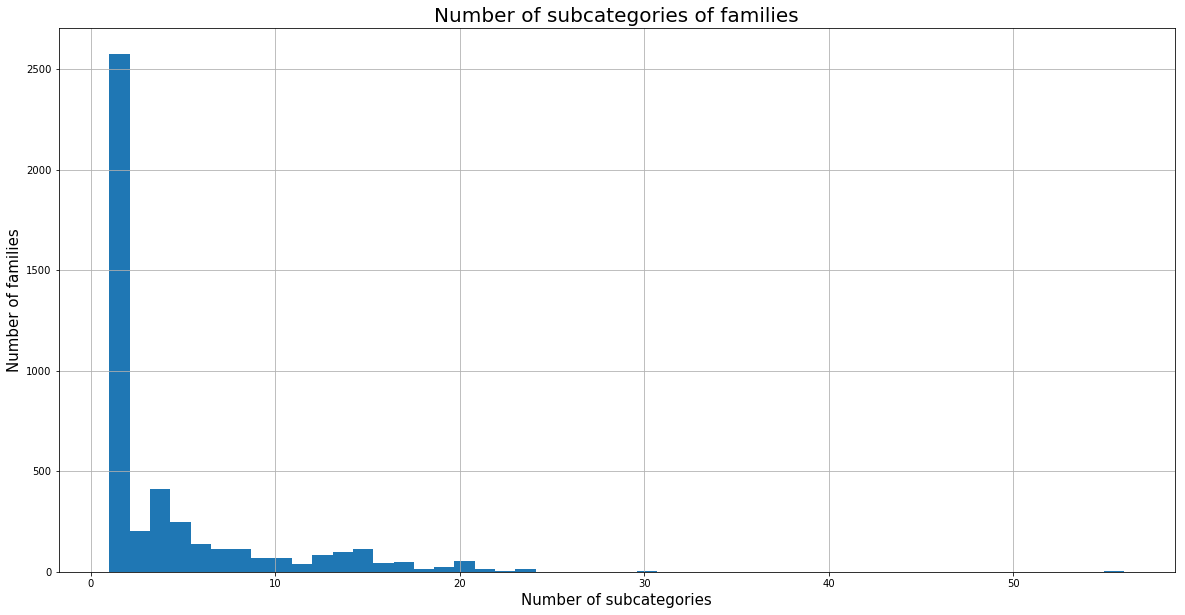

In [15]:
grouped_subcat = fs.groupby("FamilyName").agg(['count'])

grouped_subcat["Subcategory"].hist(bins=50);
plt.title("Number of subcategories of families", fontsize=20)
plt.xlabel("Number of subcategories", fontsize=15)
plt.ylabel("Number of families", fontsize=15)
plt.show()

## Most used subcategories > 100

In [16]:
fs_counts[fs_counts>100]

Hidden Lines             4157
Medium Lines              606
Glass                     561
Light Lines               544
Heavy Lines               480
Opening                   472
Frame/Mullion             454
Center line               382
Panel                     272
Taps/Mixers               262
Hardware                  236
Clearance Zones           232
Waste Outlets             229
FHRs/Hydrants             224
Penetration               224
Fire Boosters/Pumps       222
Baths/Showers             220
Basins/Sinks/Tubs         218
Urinals                   214
Elevation Swing           194
Sill/Head                 192
Toilet/Bidets             175
Swing_Elevation           174
Plan Swing                165
Seating_Freestanding      165
Swing_Plan                163
Shower Fall               154
Circulation Space         140
Gas Cooking Equipment     139
Gas Supply Fixtures       139
Location Lines            132
Rigid Links               132
Thin Lines                112
Hidden Fac

## Least used subcategories < 100

In [17]:
fs_counts[fs_counts<100]

Architrave/Trim                         97
Light Source                            93
Property Line Segments                  91
Property Lines                          91
Project Base Point                      91
Survey Point                            91
Pads                                    91
Wide Lines                              86
Stick Symbols                           85
Plan rep_Leaf_Thicknessâ€‹              78
Thresholds                              77
Plan rep_Leaf_Single line               76
Shelving                                74
Glazing - Aluminium                     68
Grab Rails                              67
Toilets/Bidets                          67
Downpipes                               67
Elevation_Swingâ€‹                      66
Structural Opening                      65
Door Swing                              64
Carcass/Framing                         62
End Panel                               59
Section_Linework_Shelf hole             59
Trim       

## No. of subcategories  (Worst Offenders)

In [18]:
sub_counts = grouped_subcat["Subcategory"]
sub_counts[sub_counts["count"]>20]

,count
FamilyName,
Articulated Vehicle_SIT,24
BVN-2016-Casework,23
BVN-2017-Casework,23
BVN-Casework - ALL - FAMILY,46
Car And Trailer_SIT,24
Cupboard_Corner Pantry_CAS,24
DCW_Door_Glass Sliding Double,21
Drainage_Roof Drain 100mm_DCO,56
Drainage_Roof Drain 150mm_DCO,56


## BVN vs non BVN Subcats

### Checks to see whether family subcategory is part of the BVN list

<b>fs_BVN</b> is a list of the BVN subcategories.

<b>is_legit</b> checks to see if the values in the Subcategories column are a part of the <b>fs_BVN</b> list and adds to the table.

In [19]:
fs_BVN = ['AV ', 'Air Handling units', 'Alarms/Sensors', 'Appliance_Fixed', 'Appliance_Freestanding', 'Appliances', 'Architrave/Trim', 'Audio Equipment', 'Balusters', 'Basins/Sinks/Tubs', 'Baths/Showers', 'Bedding', 'Bike Racks', 'Boilers', 'Cabinets/Panels', 'Carcass/Framing', 'Center line', 'Chilled Water Sets', 'Chillers', 'Chilling Beams', 'Chord', 'Clearance Zones', 'Common Edges', 'Common edges', 'Condensing Units', 'Contour', 'Conveyor Systems', 'Cooling Towers', 'Counter Tops', 'Display Boards', 'Downpipes', 'Downpipes overhead', 'Drawers/Dressers', 'Drop', 'Extraction Systems', 'FHRs/Hydrants ', 'Fans', 'Fire Boosters/Pumps', 'Form', 'Frame', 'Frame/Mullion', 'General Purpose Outlets', 'Girder', 'Glass', 'Grab Rails', 'Graphics', 'Gridlines', 'Ground Cover', 'Hard Landscaping', 'Hardware', 'Hardware_PWD', 'Heaters', 'Hidden Faces', 'Hidden Lines', 'Hidden Lines OH', 'Hidden Lines UB', 'Horizontal Bracing', 'IT', 'Joist', 'Kicker Bracing', 'Light Lines', 'Light Source', 'Lighter Lines', 'Lightest lines', 'Lighting', 'Mass Exterior Wall', 'Mass Floor', 'Mass Glazing', 'Mass Interior Wall', 'Mass Opening', 'Mass Roof', 'Mass Shade', 'Mass Skylight', 'Mass Zone', 'Medium Lines', 'Moulding/Muntins', 'Nodes', 'Opening', 'Other', 'Outdoor Furniture', 'Pads', 'Panel', 'Parking Layout', 'Partitions', 'Pattern', 'Pattern Fill', 'Pattern Lines', 'Pedestals', 'Penetration', 'People', 'Plinths', 'Primary Contours', 'Property Lines', 'Purlin', 'Railings Beyond Cut Line', 'Rails', 'Reveal', 'Rigid Links', 'Rise', 'Sash', 'Sealant', 'Seating_Fixed', 'Seating_Freestanding', 'Secondary Contours', 'Security Equipment', 'Shelving', 'Shelving_Fixed', 'Shelving_Freestanding', 'Signage', 'Sill/Head', 'Sill_Wall', 'Site Furniture', 'Site Scrape Contour', 'Speakers', 'Stick Symbols', 'Storage', 'Structural Opening', 'Sundries', 'Sweep_Cornice', 'Sweep_Skirting', 'Swing_ Elevation', 'Swing_ Plan', 'Swing_Elevation', 'Swing_Plan', 'Switchboards', 'Switches', 'Tables_Fixed', 'Tables_Freestanding', 'Taps/Mixers', 'Thick Lines', 'Thicker Lines', 'Thickest Lines', 'Thresholds', 'Toilets/Bidets', 'Transportation Equipment', 'Trees/Shrubs', 'Triangulation Edges', 'Urinals', 'Utilities', 'Variable Air Volume Terminals', 'Vehicles', 'Vertical Bracing', 'Waste outlets', 'Water Storage', 'Way Finding', 'Web', 'Wheelstops', 'Workstations/Desks']

def is_legit(row):
    return row.Subcategory in fs_BVN

fs["BVNsubcat"] = fs.apply(is_legit, axis=1)

fs.head(100)

,FamilyFilePath,FamilyName,Category,Subcategory,Id,ColourAsRGB,MaterialName,SubCategoryAction,SubcategoryActionParameter,BVNsubcat
0,Windows\Structural,Window_Square Opening_WIN,Windows,Frame/Mullion,-2000018,"0,127,0",NaN,None,NaN,True
1,Windows\Structural,Window_Square Opening_WIN,Windows,Glass,-2000016,"0,0,127",NaN,None,NaN,True
2,Windows\Structural,Window_Square Opening_WIN,Windows,Opening,-2000022,"0,0,0",NaN,None,NaN,True
3,Windows\Structural,Window_Square Opening_WIN,Windows,Overhead,6564,"0,0,0",NaN,None,NaN,False
4,Windows\Structural,Window_Square Opening_WIN,Windows,Opening Elevation,6561,"0,0,0",NaN,None,NaN,False
5,Windows\Structural,Window_Square Opening_WIN,Windows,Sill/Head,-2000020,"0,255,0",NaN,None,NaN,True
6,Windows\Structural,Window_Square Opening_WIN,Windows,Hidden Lines,-2009500,"0,0,127",NaN,None,NaN,True
7,Windows\Structural,Window_Round Opening_WIN,Windows,Frame/Mullion,-2000018,"0,127,0",NaN,None,NaN,True
8,Windows\Structural,Window_Round Opening_WIN,Windows,Glass,-2000016,"0,0,127",NaN,None,NaN,True
9,Windows\Structural,Window_Round Opening_WIN,Windows,Opening,-2000022,"0,0,0",NaN,None,NaN,True


## Families with non-BVN subcategories

<b>not_legit</b> lists the families that have wrong subcategories and its wrong subcategory name.

In [20]:
not_legit = fs[fs.BVNsubcat==False]

print "Number of non-BVN subcategories:", not_legit.shape
not_legit.head(10)

Number of non-BVN subcategories: (7596, 10)


,FamilyFilePath,FamilyName,Category,Subcategory,Id,ColourAsRGB,MaterialName,SubCategoryAction,SubcategoryActionParameter,BVNsubcat
3,Windows\Structural,Window_Square Opening_WIN,Windows,Overhead,6564,"0,0,0",NaN,None,NaN,False
4,Windows\Structural,Window_Square Opening_WIN,Windows,Opening Elevation,6561,"0,0,0",NaN,None,NaN,False
10,Windows\Structural,Window_Round Opening_WIN,Windows,Overhead,7757,"0,0,0",NaN,None,NaN,False
11,Windows\Structural,Window_Round Opening_WIN,Windows,Opening Elevation,7754,"0,0,0",NaN,None,NaN,False
14,Windows\Special,Window Round_basic,Windows,Trim,671,"0,0,0",NaN,None,NaN,False
18,Windows\Special,Window Round_basic,Windows,Elevation Swing,138,"0,0,0",NaN,None,NaN,False
21,Windows\Special,Window Round_basic,Windows,Plan Swing,137,"0,0,0",NaN,None,NaN,False
22,Windows\Special,Window Lancet_basic,Windows,Trim,671,"0,0,0",NaN,None,NaN,False
26,Windows\Special,Window Lancet_basic,Windows,Elevation Swing,138,"0,0,0",NaN,None,NaN,False
29,Windows\Special,Window Lancet_basic,Windows,Plan Swing,137,"0,0,0",NaN,None,NaN,False


## No. of times non-BVN subcategories are used

In [21]:
print len(not_legit.Subcategory.unique())
not_legit.Subcategory.value_counts()

638


Heavy Lines                             480
Waste Outlets                           229
FHRs/Hydrants                           224
Elevation Swing                         194
Toilet/Bidets                           175
Plan Swing                              165
Shower Fall                             154
Circulation Space                       140
Gas Cooking Equipment                   139
Gas Supply Fixtures                     139
Location Lines                          132
Thin Lines                              112
Fittings                                101
Property Line Segments                   91
Project Base Point                       91
Survey Point                             91
Wide Lines                               86
Plan rep_Leaf_Thicknessâ€‹               78
Plan rep_Leaf_Single line                76
Glazing - Aluminium                      68
Elevation_Swingâ€‹                       66
Door Swing                               64
Carcass                         